# Redes Neuronales
## Preparacion de datos para el modelo

In [1]:
import sys
sys.path.append('../')

import Utilidades as ut
import Modelos as md
import numpy as np
import pandas as pd


df_train = pd.read_pickle("../Archivos/Neuronales_entrenamiento.pkl")
df_test = pd.read_pickle("../Archivos/Neuronales_validacion.pkl")

x_train, y_train = ut.split_labels(df_train)
x_test, y_test = ut.split_labels(df_test)

#Convertimos las fechas a numeros (cantidad de dias transcurridos) y luego las normalizamos
x_train, x_test = ut.conversion_fechas(x_train, x_test)
x_train, x_test = ut.codificar_categoricas(x_train, y_train, x_test, modo='catboost')
x_train, x_test = ut.normalizacion_numericas(x_train, x_test, modo='normalizacion')
x_train.head(3)

/home/julian/anaconda3/envs/tensorflow/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Sales_Contract_No,Opportunity_Name,Planned_Opportunity_Duration,Account_Name,Product_Name,Planned_Time_Until_Deliver,Bureaucratic_Code,Last_Modified_By,Opportunity_Owner,Product_Family,Opportunity_Type,Total_Amount(USD),Account_Owner,Account_Type,Opportunity_Created_Date,Territory,Product_Amount_Deviation_of_Product_Family_rate,Planned_Deliver_Duration,Account_Created_Date,Billing_Country
0,0.42,-0.08,13.14,-0.02,0.15,15.21,0.14,0.37,0.38,0.34,0.50,0.89,0.33,0.39,-4.78,0.36,0.97,-0.41,-1.35,0.53
1,-0.39,-0.08,5.51,-0.02,0.15,6.19,0.14,0.37,0.38,0.34,0.50,1.63,0.33,-1.09,-4.22,0.36,2.44,0.28,-0.96,0.53
2,-0.66,-0.08,5.98,-0.02,0.15,6.75,0.14,0.37,0.38,0.34,-1.06,0.47,0.33,0.39,-4.19,0.36,-0.70,0.26,-1.29,0.53


## Creacion del modelo.

In [55]:
import keras
import tensorflow as tf
#from keras import backend
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import Dropout
#from keras.regularizers import l1
#from keras.regularizers import l2
#from keras.regularizers import l1_l2


x_train_vector = ut.df_a_vector(x_train)
y_train_vector = ut.df_a_vector(y_train)
x_test_vector = ut.df_a_vector(x_test)
y_test_vector = ut.df_a_vector(y_test)

#input_dim = x_train.shape[1]
#
#alfa = 1e-3
#
#model = Sequential()
#model.add(Dense(64, input_dim=input_dim, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(128, kernel_regularizer=l1(alfa), bias_regularizer=l1(alfa), activation='relu'))
##model.add(Dropout(0.25))
##model.add(Dense(256, kernel_regularizer=l1(alfa), bias_regularizer=l1(alfa), activation='tanh'))
#model.add(Dropout(0.5))
#model.add(Dense(128, kernel_regularizer=l1(alfa), bias_regularizer=l1(alfa), activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(64, kernel_regularizer=l1(alfa), bias_regularizer=l1(alfa), activation='tanh'))
#model.add(Dropout(0.25))
#model.add(Dense(16, kernel_regularizer=l1(alfa), bias_regularizer=l1(alfa), activation='relu'))
#model.add(Dense(8, kernel_regularizer=l1(alfa), bias_regularizer=l1(alfa), activation='relu'))
#model.add(Dense(1, activation='tanh'))
#
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#
#backend.set_value(model.optimizer.learning_rate, 5e-4)

best_hparams = ut.hyperparams_from_json('../Archivos/Neuronales')
model = md.get_neural_network_model(best_hparams, x_train.shape[1])

epochs = 300
batch_size = 256


my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint("Neuronales_Mejor_Modelo.hdf5", 
                                       monitor='val_loss', 
                                       verbose=0,
                                       save_best_only=True, 
                                       mode='min'),
    
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                     min_delta=0.0001,
                                     mode='min',
                                     patience=30),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                      mode='min',
                                      factor=0.5,
                                      patience=5,
                                      cooldown=0, 
                                      min_lr=1e-24)
]

fit_dict = {
    #'x' : x_train_vector,
    #'y' : y_train_vector,
    #'validation_data' : (x_test_vector, y_test_vector),
    'epochs' : epochs,
    'batch_size' : batch_size,
    'verbose' : 1,
    'callbacks' : my_callbacks
}


history = model.fit(x_train_vector,
                    y_train_vector,
                    validation_data=(x_test_vector, y_test_vector),
                    **fit_dict)


#Mejor modelo hasta el momento val_loss = 0.3858

Cargando hiperparametros desde el archivo: '../Archivos/Neuronales_best_hyperparam.json'
Epoch 1/300
48/48 [==============================] - 1s 22ms/step - loss: 19.0872 - val_loss: 5.2466 - lr: 0.0042
Epoch 2/300
48/48 [==============================] - 1s 18ms/step - loss: 2.6842 - val_loss: 1.6675 - lr: 0.0042
Epoch 3/300
48/48 [==============================] - 1s 15ms/step - loss: 1.2176 - val_loss: 0.9544 - lr: 0.0042
Epoch 4/300
48/48 [==============================] - 1s 16ms/step - loss: 0.8181 - val_loss: 0.7925 - lr: 0.0042
Epoch 5/300
48/48 [==============================] - 1s 15ms/step - loss: 0.7925 - val_loss: 0.8697 - lr: 0.0042
Epoch 6/300
48/48 [==============================] - 1s 14ms/step - loss: 0.7813 - val_loss: 0.7934 - lr: 0.0042
Epoch 7/300
48/48 [==============================] - 1s 15ms/step - loss: 0.7167 - val_loss: 0.7300 - lr: 0.0042
Epoch 8/300
48/48 [==============================] - 1s 16ms/step - loss: 0.6799 - val_loss: 0.7214 - lr: 0.0042
Epoch 

## Resultados

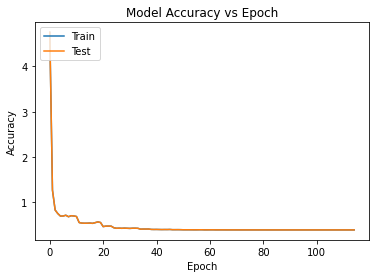

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
#new_model = keras.models.load_model('Neuronales_Mejor_Modelo.hdf5')
#new_predictions = new_model.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score

y_pred = [a > 0.5 for a in model.predict(x_test_vector).flatten()]

score = accuracy_score(y_pred, y_test_vector)
score

0.9483942414174973

In [46]:
model.evaluate(x_test_vector, y_test_vector)#, metrics=['accuracy'])

142/142 [==============================] - 0s 2ms/step - loss: 0.3940


0.3939661979675293

In [42]:
#Podemos analizar las filas que originaron los errores de prediccion

analysis_df = y_test.copy()
analysis_df['Predicted'] = pd.Series(y_pred).astype(int)
differences = (analysis_df['Predicted'] != analysis_df['Stage'])
df_test[differences]

,Sales_Contract_No,Opportunity_Name,Planned_Opportunity_Duration,Account_Name,Product_Name,Planned_Time_Until_Deliver,Bureaucratic_Code,Last_Modified_By,Opportunity_Owner,Product_Family,...,Total_Amount(USD),Account_Owner,Account_Type,Opportunity_Created_Date,Territory,Product_Amount_Deviation_of_Product_Family_rate,Planned_Deliver_Duration,Account_Created_Date,Billing_Country,Stage
25,3709,Opportunity_Name_12017,28.0,Account_Name_1931,Product_Name_123,12.0,Bureaucratic_Code_4,Person_Name_19,Person_Name_65,Product_Family_98,...,4.280601,Person_Name_21,Account_Type_2,2018-01-03,Singapore,-0.071512,16.0,2016-09-16,Singapore,0
32,3719,Opportunity_Name_2001,151.0,Account_Name_25,Product_Name_209,151.0,Bureaucratic_Code_4,Person_Name_8,Person_Name_8,Product_Family_128,...,5.263733,Person_Name_8,Account_Type_0,2018-01-04,NW America,0.056974,0.0,2013-07-27,United States,0
37,3718,Opportunity_Name_2007,137.0,Account_Name_25,Product_Name_220,137.0,Bureaucratic_Code_4,Person_Name_8,Person_Name_8,Product_Family_133,...,5.572315,Person_Name_8,Account_Type_0,2018-01-04,NW America,0.112459,0.0,2013-07-27,United States,0
41,3721,Opportunity_Name_2008,165.0,Account_Name_25,Product_Name_220,165.0,Bureaucratic_Code_4,Person_Name_8,Person_Name_8,Product_Family_133,...,5.447377,Person_Name_8,Account_Type_0,2018-01-04,NW America,0.087516,0.0,2013-07-27,United States,0
44,3719,Opportunity_Name_2001,172.0,Account_Name_25,Product_Name_209,172.0,Bureaucratic_Code_4,Person_Name_8,Person_Name_8,Product_Family_128,...,4.962705,Person_Name_8,Account_Type_0,2018-01-04,NW America,-0.003474,0.0,2013-07-27,United States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,None,Opportunity_Name_11323,32.0,Account_Name_533,Product_Name_241,21.0,Bureaucratic_Code_4,Person_Name_13,Person_Name_13,Product_Family_140,...,4.197744,Person_Name_13,Account_Type_0,2018-11-19,Germany,-0.142391,11.0,2013-07-27,Germany,1
4349,5424,Opportunity_Name_3261,16.0,Account_Name_293,Product_Name_159,12.0,Bureaucratic_Code_4,Person_Name_51,Person_Name_51,Product_Family_114,...,4.728685,Person_Name_51,Account_Type_2,2018-11-28,Netherlands,-0.009584,4.0,2016-09-14,Netherlands,0
4353,5424,Opportunity_Name_3261,16.0,Account_Name_293,Product_Name_190,12.0,Bureaucratic_Code_4,Person_Name_51,Person_Name_51,Product_Family_117,...,3.799033,Person_Name_51,Account_Type_2,2018-11-28,Netherlands,-0.223554,4.0,2016-09-14,Netherlands,0
4369,None,Opportunity_Name_11177,11.0,Account_Name_1693,Product_Name_241,7.0,Bureaucratic_Code_4,Person_Name_13,Person_Name_13,Product_Family_140,...,4.875511,Person_Name_13,Account_Type_0,2018-12-03,Germany,-0.003922,4.0,2013-07-27,Germany,1
